# Cat Food Analysis

## Motivation

The motivation behind this project is that recently after adopting a feline friend, I was overwhelmed with the number of cat food options on the market. To make matters worse, while I would love to spoil my kitten, the pricing of cat food brands varies wildly. The goal of this project is to be able to identify some of the best brands to keep your kitty happy and healthy without breaking the bank

## About the Data

The data is scaped from https://felinecrf.org/ which claims it gained the information from These analyses have been compiled in good faith from the information provided to me by the brands concerned. I have obtained the data in writing (or in some cases from the brand's website) and use dry matter analysis making the way the information is gathered appear off from some other datasets out there.


The dataset contains:
   * Protein: percent of food which is protein
   * Fat: (float) percent of food which is fat
   * Carbohydrates: (float) percent of food which is carbs
   * Sodium: (float) percent of food which is sodium
   * Phosphorus levels: (floating [0-1])
   * Calories: calories per oz of food
   * Minimum: (boolean)- only true if the prosphorus, protein, fat, sodium, carb, and cals are computed as the minimum instead of the average leading to potentially lower numbers than are actually present
   * Date Obtained: (dd/mmm/yy)


It is also classafied as theapeutic kidney wet food, standard wet food, raw foods, and therapeutic foods for other conditions


The website also mentions that in good cat food are
* Protein levels as close to 35% as possibe
* Phosphorus levels as close to below 0.5% as possible (difficult in non-therapeutic cat food)
* Sodium levels less than .2% (not as important as protein/phosphorus)
* Fat and carbohydrates are less of a consideration in healthy non-diabetic cats

## Gathering the Data

In [1]:
# imports needed for data collection

import requests
from bs4 import BeautifulSoup

import re

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', None)

In [2]:
# Scraping the website

URL = "https://felinecrf.org/canned_food_usa.htm"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")

soup

<html>
<head>
<meta content="Microsoft FrontPage 5.0" name="GENERATOR"/>
<meta content="FrontPage.Editor.Document" name="ProgId"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="en-us" http-equiv="Content-Language"/>
<title>Tanya's Comprehensive Guide to Feline Chronic Kidney Disease- Canned Food 
Data USA</title>
<style>
<!--
.font6
	{color:#660066;
	font-size:10.0pt;
	font-weight:400;
	font-style:italic;
	text-decoration:none;
	font-family:Arial, sans-serif;
	}
.font5
	{color:black;
	font-size:10.0pt;
	font-weight:400;
	font-style:italic;
	text-decoration:none;
	font-family:Arial, sans-serif;
	}
table.MsoTableGrid
	{border:1.0pt solid black;
	line-height:115%;
	font-size:11.0pt;
	font-family:"Verdana","sans-serif";
	}
.font0
	{color:black;
	font-size:11.0pt;
	font-weight:400;
	font-style:normal;
	text-decoration:none;
	font-family:Calibri, sans-serif;
	}
.font8
	{color:black;
	font-size:11.0pt;
	font-weight:700;
	font-style:normal;
	text-decoratio

In [3]:
# Gets the standard wet foods table
table = soup.find_all('table')[5]

# Creates an array which will store arrays of rows of data
# Which will be converted to pandas
tableData = []

# Gets each row from the table and adds it to a pandas dataframe
for row in table.find_all('tr')[1:]:
    rowData = []
    
    # Adds all the data from each field into a multi-dimensional array
    for field in row.find_all('td'):
        field = field.text.replace("\n", "").replace("#", "").strip()
        if field == "na" or len(field) == 0 or field == None:
            field = np.nan
        rowData.append(field)
    
    # Removes the * to indicate minimum and instead adds a field with a boolean for it
    if rowData[0][-1] == "*":
        rowData[0] = rowData[0][0:-2]
        rowData.append(True)
    else:
        rowData.append(False)
    
    # Adds data to the table
    tableData.append(rowData)
    
# Removes multiple spaces from string
for i in range(len(tableData)):
    tableData[i][0] = re.sub(" +", " ", tableData[i][0])
    
    # Converts all numbers that can be turned to floats into floats
    for j in range(len(tableData[i]) - 1):
        try:
            tableData[i][j] = float(tableData[i][j])
        except:
            pass
tableData

[["My Perfect Pet Bengal's Beef Carnivore Grain-Free Blend",
  0.5,
  69.3,
  0.2,
  17.6,
  nan,
  61.5,
  '26-Jan-20',
  False],
 ["Hill's Science Diet Adult Tender Tuna Dinner",
  0.52,
  41.3,
  0.48,
  17.5,
  32.6,
  29.45,
  '1-Feb-20',
  False],
 ["Hill's Science Diet Adult 7+ Tender Tuna Dinner",
  0.54,
  41.8,
  0.47,
  18.9,
  30.0,
  27.64,
  '1-Feb-20',
  False],
 ['Wellness Healthy Indulgence Morsels Chicken & Chicken Liver Pouch',
  0.55,
  37.87,
  1.54,
  30.91,
  23.01,
  20.67,
  '1-Feb-20',
  False],
 ['Wellness Healthy Indulgence Morsels Chicken & Salmon Pouch',
  0.56,
  39.86,
  1.53,
  27.18,
  21.04,
  20.67,
  '1-Feb-20',
  False],
 ["Hill's Science Diet Adult 11+ Healthy Cuisine Seared Tuna & Carrot Medley",
  0.57,
  37.6,
  0.38,
  19.9,
  35.5,
  23.57,
  '1-Feb-20',
  False],
 ['Truluxe Steak Frites',
  0.57,
  61.9,
  0.22,
  27.8,
  7.5,
  20.67,
  '26-Jan-20',
  False],
 ["Hill's Science Diet Adult Healthy Cuisine Roasted Chicken & Rice Medley",
  0.5

In [4]:
# Create pandas dataframe from array
df = pd.DataFrame(tableData, columns=["Brand Name", "Phosphorus", "Protein", "Sodium", "Fat", "Carbs", "Calories", "Date Obtained", "Minimum"])
df

Brand Name  \
0                     My Perfect Pet Bengal's Beef Carnivore Grain-Free Blend   
1                                Hill's Science Diet Adult Tender Tuna Dinner   
2                             Hill's Science Diet Adult 7+ Tender Tuna Dinner   
3           Wellness Healthy Indulgence Morsels Chicken & Chicken Liver Pouch   
4                  Wellness Healthy Indulgence Morsels Chicken & Salmon Pouch   
...                                                                       ...   
1027  Tiki Cat Grain-Free Sardine Cutlets in Lobster Consommé (Bora Bora Luau   
1028                    Friskies Extra Gravy Pâté with Turkey in Savory Gravy   
1029                      Merrick Purrfect Bistro Grain-Free Surf N Turf Pâté   
1030                          Koha Grain-Free Limited Ingredient Rabbit au Ju   
1031                               Wellness Core Kitten Chicken & Turkey Pâté   

      Phosphorus  Protein  Sodium    Fat  Carbs  Calories Date Obtained  \
0           0.50    69.30    0.20  17.60    NaN     61.50     26-Jan-20   
1           0.52    41.30    0.48  17.50  32.60     29.45      1-Feb-20   
2           0.54    41.80    0.47  18.90  30.00     27.64      1-Feb-20   
3           0.55    37.87    1.54  30.91  23.01     20.67      1-Feb-20   
4           0.56    39.86    1.53  27.18  21.04     20.67      1-Feb-20   
...          ...      ...     ...    ...    ...       ...           ...   
1027        2.85    72.22     NaN  16.67   0.00     20.71     30-Jan-20   
1028        2.90    50.80     NaN    NaN    NaN       NaN      7-Sep-18   
1029        3.25    54.37    2.18  29.71   6.21     28.18     26-Jun-19   
1030        3.98    53.81    0.48  25.87   0.00     25.33     13-Aug-19   
1031        4.72    49.30    1.89  31.69   4.75     36.18      1-Feb-20   

      Minimum  
0       False  
1       False  
2       False  
3       False  
4       False  
...       ...  
1027     True  
1028    False  
1029    False  
1030     True  
1031    False  

[1032 rows x 9 columns]

In [5]:
# Saves the dataframe into a csv file
# df.to_csv("catfood.csv", index=False)

## Numeric Analysis

In [6]:
# def calculate_field(arr, minimum, greaterThan=True):
#     counter = 0
#     for element in arr:
#         if greaterThan and float(element) > minimum:
#             counter = counter +1
#         elif not greaterThan and float(element) < minimum:
#             counter = counter + 1
#     return str(np.round((counter / len(arr)*100), 2)) + "%"


protein_counter = 0
phosphorus_counter = 0
sodium_counter = 0
for i, row in df.iterrows():
    if float(row["Protein"]) > 35:
        protein_counter = protein_counter +1
    
    if float(row["Phosphorus"]) < .499:
        phosphorus_counter = phosphorus_counter +1
    
    if float(row["Sodium"]) < .2:
        sodium_counter = sodium_counter +1

protein_counter = str(np.round((protein_counter / len(df)*100), 2)) + "%"
phosphorus_counter = str(np.round((phosphorus_counter / len(df)*100), 2)) + "%"
sodium_counter = str(np.round((sodium_counter / len(df)*100), 2)) + "%"

print("Percent of wet cat foods that meet the 35% protein requirements set: " + protein_counter)
print("Percent of wet cat foods that meet the .5% phosphorus requirements set: " + phosphorus_counter)
print("Percent of wet cat foods that meet the .2% sodium requirements set: " + sodium_counter)



Percent of wet cat foods that meet the 35% protein requirements set: 97.29%
Percent of wet cat foods that meet the .5% phosphorus requirements set: 0.0%
Percent of wet cat foods that meet the .2% sodium requirements set: 1.36%


In [7]:
numeric_df = df.drop(["Brand Name", "Date Obtained", "Minimum"], axis=1)    

print("===== Five Number Summary =====", end="\n\n")
for column in numeric_df.columns:
    print(column)
    print("Minimum:              " + str(np.nanmin(df[column].astype(float))))
    print("Maximum:              " + str(np.nanmax(df[column].astype(float))))
    print("Standard Deviation:   " + str(np.nanstd(df[column].astype(float))))
    print("Median:               " + str(np.nanmedian(df[column].astype(float))))
    print("Mean:                 " + str(np.nanmean(df[column].astype(float))))
    print("")

===== Five Number Summary =====

Phosphorus
Minimum:              0.5
Maximum:              4.72
Standard Deviation:   0.43493727291479706
Median:               1.2
Mean:                 1.2755523255813952

Protein
Minimum:              28.33
Maximum:              84.0
Standard Deviation:   11.543074405739157
Median:               50.11
Mean:                 52.92099806201551

Sodium
Minimum:              0.11
Maximum:              2.8
Standard Deviation:   0.4568360199567732
Median:               0.575
Mean:                 0.7119301848049282

Fat
Minimum:              7.61
Maximum:              52.4
Standard Deviation:   9.195287671262017
Median:               25.0
Mean:                 25.63892128279883

Carbs
Minimum:              0.0
Maximum:              39.3
Standard Deviation:   8.858383728682249
Median:               9.79
Mean:                 11.303183856502242

Calories
Minimum:              0.0
Maximum:              61.5
Standard Deviation:   6.1537600692662755
Median:     

## Graphical Analysis

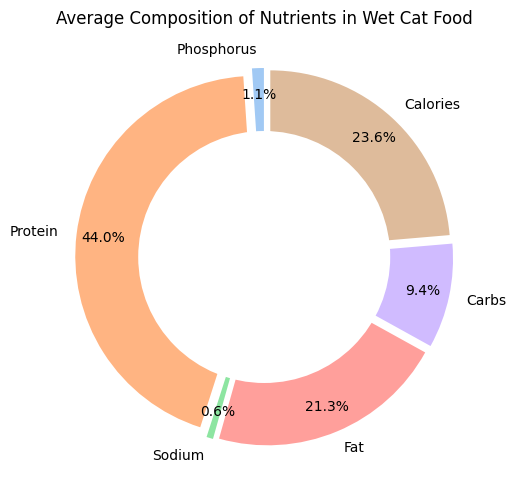

In [30]:
#Takes the mean of each column
# And then compares each mean to get the porportion out of 100
# Since the mean wouldn't necessarily equal exactly 100
data = []
labels = []
for column in numeric_df.columns: 
    x = np.nanmean(df[column])
    data.append(x)
    labels.append(column)

# Creates the color map used in all the plots
colors = sns.color_palette('pastel')[0:7]

# Creates the amount of seperation between each 
explode = [0.05] * 6
 
# Creates the plot
plot = plt.pie(data, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

# Creates the circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()

# Sets the title for the pie chart
plt.title("Average Composition of Nutrients in Wet Cat Food")

# plt.savefig('wetCatFood-fig1.png',bbox_inches='tight', dpi=300)
plt.show()

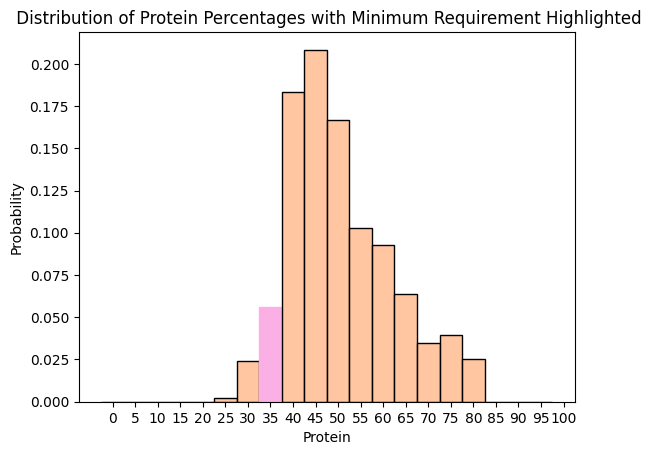

In [32]:
# Sets the bins for the histogram to be at 0, 5, 10, ... 95, 100
bin_size = 5
bins = np.arange(0,100 + bin_size,bin_size)

# Creates the histogram
plot = sns.histplot(data=numeric_df, x="Protein", bins=bins, color=colors[labels.index("Protein")], stat='probability')

# Aligns the labels for the bins of the histogram to center
mids = [rect.get_x() + rect.get_width() / 2 for rect in plot.patches]
plot.set_xticks(bins+bin_size/2, bins)

# Sets the bin for protein is 35 to a different color
patch_index = np.digitize(35-bin_size, bins)
plot.patches[patch_index].set_color(colors[-1])

# Sets the title
plot.set(title=" Distribution of Protein Percentages with Minimum Requirement Highlighted")

# plt.savefig('wetCatFood-fig2.png',bbox_inches='tight', dpi=300)

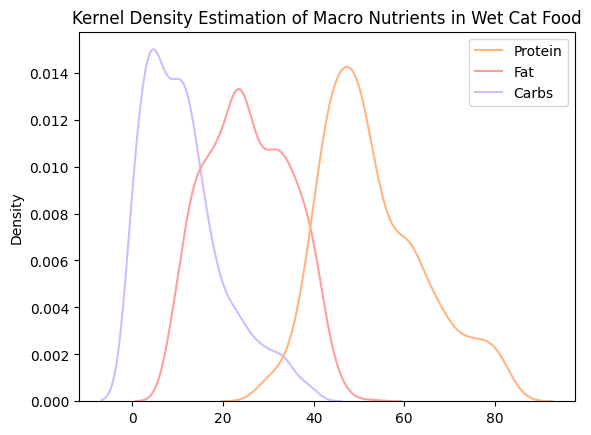

In [33]:

# Gets the colors used for each color in the pie chart
kde_colors = [colors[labels.index("Protein")], colors[labels.index("Fat")], colors[labels.index("Carbs")]]

# Creates the kde plot of protein, fat, and carbs
plot = sns.kdeplot(data=numeric_df[["Protein", "Fat", "Carbs"]], palette=kde_colors)

plot.set(title="Kernel Density Estimation of Macro Nutrients in Wet Cat Food")

plt.savefig('wetCatFood-fig3.png',bbox_inches='tight', dpi=300)

## Conclusion

The numerical analysis shows that while the phosphorus levels of cat food almost never fall below .5 as stated on https://felinecrf.org/, the protein levels of food are above 35%  over 97% of the time with an average of 52% protein. 

While this does show almost all wet cat foods (regardless of price) are sufficient in giving your cat enough protein, the analysis done does not factor other elements that could be important in determining which cat food is the best including other nutrients cats might need, how is the protein derieved, quality of ingredients used, etc. 